### Measuring risk: VaR and Expected Shortfall

Market Risk <br>

SD is only a **way** of measuring risk <br>
A maybe better way to grasp things: *probability of adverse event * damage/impact?*


Prob + Magnitude = **exposure** to danger ?

Uncertainty <-- Frank Knight <br>
probability assumes that we know things about the distributions, about whether they are stationary, whereas uncertainty is maybe more realistic.<br>
An umbrella that leaks only when it rains.

Risk is not a number, it's a process

Following concepts are central, tied to psychology: 
<ul>
    <li> overconfidence
    <li> representativeness
</ul>

The two following statements are radically different:

\> 50% of hedge funds failures due to operational risk (systems, controls, people, process,... not linked to market or strategy) --> notion of subset <br>
\> 50% of hedge font fail due to operational risk 

### Notes to myself

Regarding the Monty Hall problem:
I much more likely have ELIMINATED an option without a price, this in conjunction with the fact that the door oepener will never open a door with the price behind it the chance that the price will be in the other door is higher.

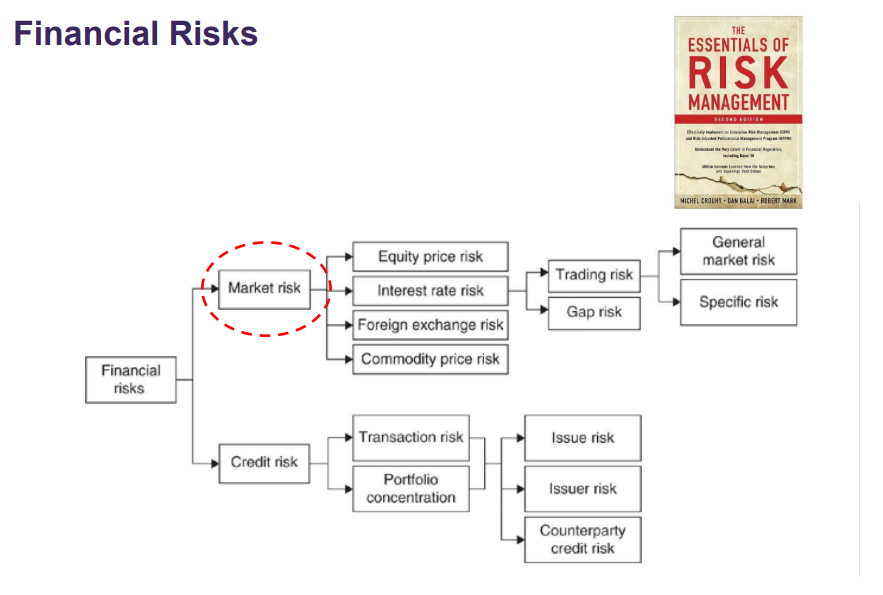

In [1]:
from IPython.display import Math, display
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename = "Fin_risks.png", width=800, height=600)

VaR measures market risk <br>
Market risk has either: <br>
<ul>
<li>a general or sysematic --> beta 
<li>Ididiosyncratic (specific) dimension --> random error (diversifiable) term
</ul>

"Invention" of Value at Risk
<br>

"JPMorgan is credited with helping to make VaR a widely used measure. The Chairman, Sir Dennis Weatherstone was dissatisfied with the long-risk reports he received every day. These contained a huge amount of detail on the Greek letters for different exposures, but very little that was really useful to top management. He asked for something simpler that focused on the bank's total exposure over the next 24 hours measured across the bank's entire trading portfolio."
<br>
<br>
DEFINITION: **VaR, this is how much we could loose, at this probability for this given time frame**

**VaR really is just a percentile in a distribution. It's a treshold.** <br>
"A percentile (or a centile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall. For example, the 20th percentile is the value (or score) below which 20% of the observations may be found."

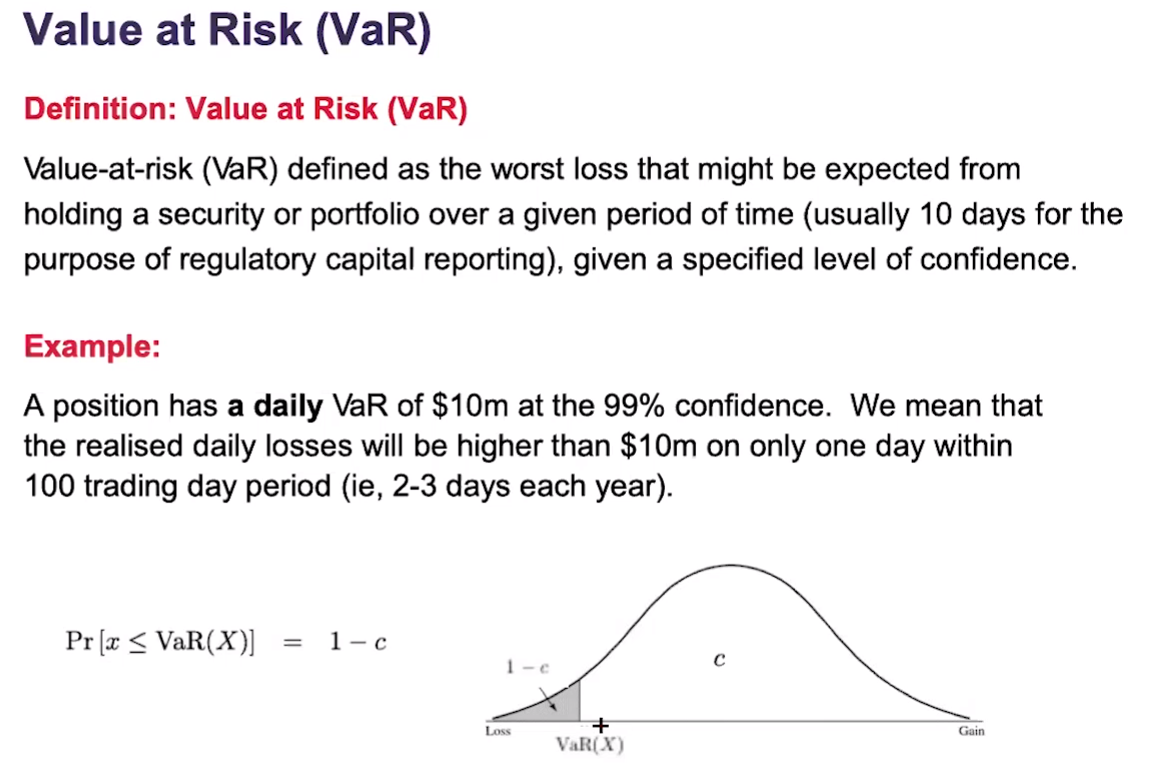

In [8]:
Image(filename = "VaR.png", width=800, height=600)

How do you come up with this distribution? <br>
3 ways: 
<ul>    
    <li> Assuming normality (parametric)
    <li> Historical data
    <li> Monte Carlo
</ul>

https://en.wikipedia.org/wiki/Notation_in_probability_and_statistics
https://introcs.cs.princeton.edu/python/appendix_gaussian/

There is a tradoff between risk and return: conclusion of Modern Portfolio Theory and CAPM

--> Measuring return is quite straightforwards <br>
--> But what about risk?

There are several measures: variance, standard deviation to measure total risk + beta to measure risk...<br>
β > 1 for a stock = riskier than the market as a whole

**These measure od not consider a probability distribution**

There is another measure with this feature: value at Risk (VaR)

<br>
We can define return as a random variable drawn from a normal distribution




The density function is closely related to probability. The integral of the function yields the probability

In [4]:
display(Math('P(a<x<b)=\\int_{a}^{b}f(x)dx'))

<IPython.core.display.Math object>

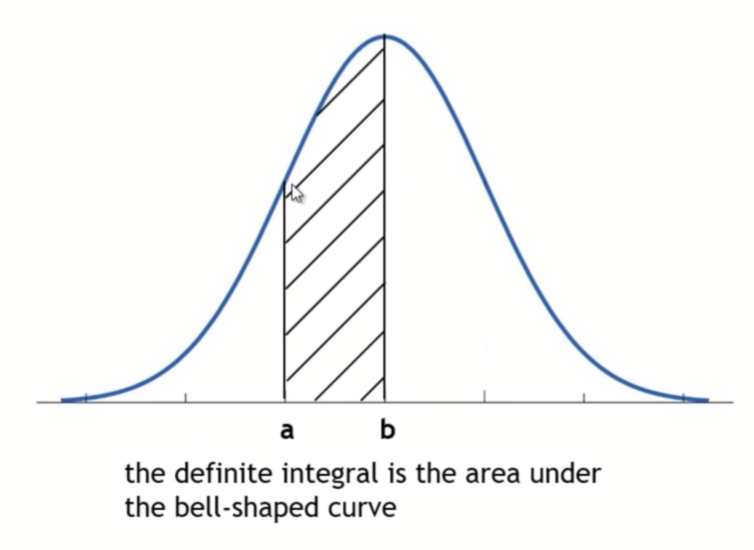

In [5]:
Image(filename = "pdf.png", width=800, height=600)

In [15]:
display(Math('VaR = \Delta S[\mu \delta t - \sigma \sqrt{\delta t} a(1-c)]'))

<IPython.core.display.Math object>

c is the confidence level
a(1-c) is the inverse cumulative distribution function for the standardized normal distribution

In [28]:
import numpy as np
import yfinance as yf
import pandas as pd
from scipy.stats import norm
import datetime

In [45]:
def download_data(stock, start_date, end_date):
    data = {}
    ticker = yf.download(stock, start_date, end_date)
    data[stock] = ticker['Adj Close']
    return pd.DataFrame(data)


def calculate_var(position, c, mu, sigma):
    var = position * (mu - sigma * norm.ppf(1-c))
    return var

def calculate_var_n(position, c, mu, sigma, n):
    var = position * (mu * n - sigma * np.sqrt(n) * norm.ppf(1-c))
    return var



-1.6448536269514722


In [46]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 1, 1)
stock_data = download_data('C', start, end)
stock_data['returns'] = np.log(stock_data['C'] / stock_data['C'].shift(1))
stock_data = stock_data[1:]
print(stock_data)

# this is the investment (stocks or whatever)
S = 1e6

# confidence level - this time it's 95%
c = 0.95

# we assume that daily returns are normally distributed
mu = np.mean(stock_data['returns'])
sigma = np.std(stock_data['returns'])


print('Value at risk is: $%0.2f' % calculate_var(S, c, mu, sigma))




[*********************100%***********************]  1 of 1 completed
                    C   returns
Date                           
2014-01-02  44.773449  0.003066
2014-01-03  45.741383  0.021388
2014-01-06  46.092587  0.007649
2014-01-07  46.409519  0.006852
2014-01-08  46.949162  0.011561
...               ...       ...
2017-12-22  66.457901 -0.004362
2017-12-26  65.832870 -0.009449
2017-12-27  65.929688  0.001470
2017-12-28  66.096954  0.002534
2017-12-29  65.507118 -0.008964

[1007 rows x 2 columns]
Value at risk is: $25387.35
-1.6448536269514722


We can say with 95% confidence level that we are not going to loose more money than 25k dollars. It's max loss

In [44]:
print('Value at risk is: $%0.2f' % calculate_var_n(S, c, mu, sigma, 10))
# If we invest 1 million today, then what is the possible loss with 95% confidence levle in 10 days time

Value at risk is: $82886.62


### Displaying the probability density function

-1.6448536269514722


'\nIt simply returns the value at the 95% percentile (or 100-95 percentile \nhere as norm.pf is the inverse of of norm.cdf. There is no "standard deviation multiplier" involved.\n'

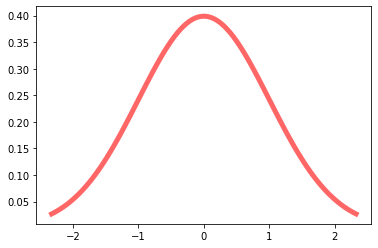

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')


print(norm.ppf(1-c))
"""
It simply returns the value at the 95% percentile (or 100-95 percentile 
here as norm.pf is the inverse of of norm.cdf. There is no "standard deviation multiplier" involved.
"""

# np.linspace: Returns evenly spaced numbers over a specified interval
